# TUGAS

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

- Buatlah model CNN untuk klasifikasi dataset MNIST.

1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

##### Langkah 1 : Import Library


In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image


##### Langkah 2: Memuat dataset CIFAR 1O



In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


##### Langkah 3 : Normalisasi data dan konversi label ke vektor one-hot encoded



In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##### Langkah 4: Memisahkan data latih menjadi data latih dan data validasi



In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


##### Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)



In [5]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model


##### Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data



In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

##### Langkah 7: Membuat model dan mengompilasi



In [7]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

##### Langkah 8: Melatih model dengan ImageDataGenerator



In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)


Epoch 1/50
625/625 [==============================] - 44s 49ms/step - loss: 2.1474 - accuracy: 0.1965 - val_loss: 1.8115 - val_accuracy: 0.3347
Epoch 2/50
625/625 [==============================] - 32s 51ms/step - loss: 1.7606 - accuracy: 0.3447 - val_loss: 1.5265 - val_accuracy: 0.4439
Epoch 3/50
625/625 [==============================] - 31s 49ms/step - loss: 1.5543 - accuracy: 0.4385 - val_loss: 1.4136 - val_accuracy: 0.4966
Epoch 4/50
625/625 [==============================] - 31s 49ms/step - loss: 1.4300 - accuracy: 0.4994 - val_loss: 1.2209 - val_accuracy: 0.5686
Epoch 5/50
625/625 [==============================] - 30s 48ms/step - loss: 1.3214 - accuracy: 0.5493 - val_loss: 1.1088 - val_accuracy: 0.6219
Epoch 6/50
625/625 [==============================] - 31s 49ms/step - loss: 1.2415 - accuracy: 0.5838 - val_loss: 1.1100 - val_accuracy: 0.6215
Epoch 7/50
625/625 [==============================] - 31s 49ms/step - loss: 1.1804 - accuracy: 0.6101 - val_loss: 1.0496 - val_accuracy:

##### Langkah 9: Mengevaluasi model pada set tes



In [9]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6861 - accuracy: 0.8323


##### Langkah 10: Melakukan prediksi



<Axes: >

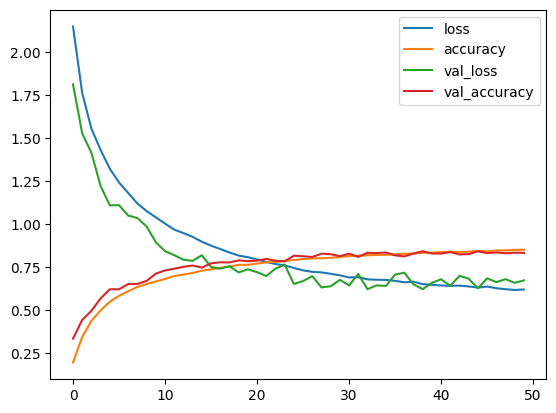

In [10]:
pd.DataFrame(history.history).plot()


##### Langkah 11: Tampilkan laporan klasifikasi



In [11]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1000
           1       0.93      0.92      0.93      1000
           2       0.87      0.69      0.77      1000
           3       0.78      0.59      0.67      1000
           4       0.79      0.81      0.80      1000
           5       0.71      0.80      0.75      1000
           6       0.77      0.96      0.85      1000
           7       0.82      0.91      0.87      1000
           8       0.95      0.88      0.91      1000
           9       0.84      0.94      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



##### Langkah 12: Menampilkan visualisasi hasil prediksi



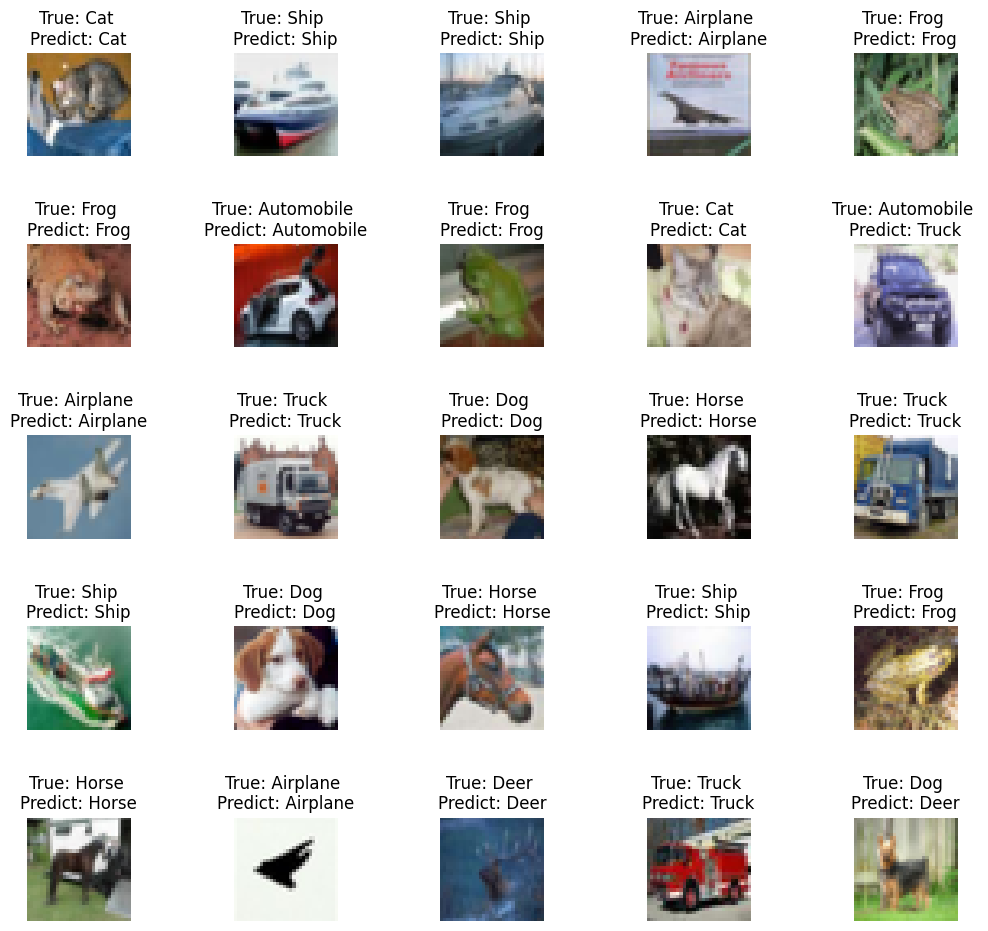

In [12]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

2. Buatlah model CNN untuk klasifikasi dataset MNIST


##### Langkah 1: Memuat Dataset MNIST



In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


##### Langkah 2: Normalisasi Gambar ke Rentang [0, 1]



In [14]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

##### Langkah 3: Mengonversi Label ke Format One-Hot Encoding



In [15]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

##### Langkah 4: Menampilkan Informasi tentang Dataset



In [16]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


##### Langkah 5: Membangun Model



In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

##### Langkah 6: Mengompilasi Model



In [18]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


##### Langkah 7: Menampilkan Ringkasan Model



In [19]:
# Menampilkan ringkasan model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

##### Langkah 8: Melatih Model



In [20]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)


Epoch 1/10
329/329 - 4s - loss: 0.3742 - accuracy: 0.8826 - val_loss: 0.0924 - val_accuracy: 0.9714 - 4s/epoch - 12ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1017 - accuracy: 0.9712 - val_loss: 0.0677 - val_accuracy: 0.9785 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0778 - accuracy: 0.9769 - val_loss: 0.0532 - val_accuracy: 0.9847 - 2s/epoch - 6ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0458 - val_accuracy: 0.9859 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.0517 - val_accuracy: 0.9853 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0454 - val_accuracy: 0.9874 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.0481 - val_accuracy: 0.9867 - 2s/epoch - 5ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0520 - val_accuracy: 0.9850 - 2s/epoch - 6ms/step
Epoch 9/10
329/329 - 2s

##### Langkah 9: Plot Sejarah Pelatihan



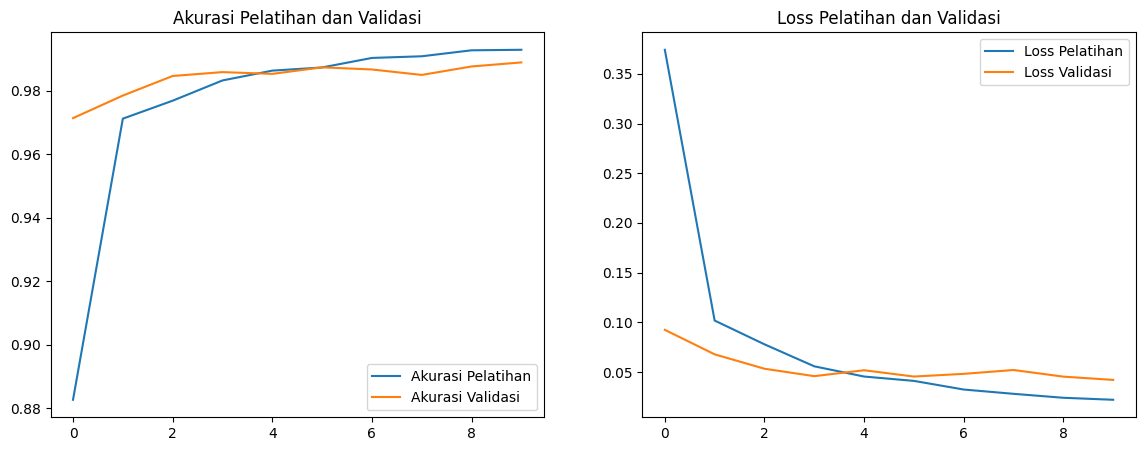

In [21]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

##### Langkah 10: Evaluasi Model pada Kumpulan Data Uji



In [22]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.029935210943222046
Akurasi Validasi: 0.991100013256073


##### Langkah 11: Menghasilkan Nilai Prediksi pada Kumpulan Data Uji



In [23]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


##### Langkah 12: Mendekode Nilai Prediksi



In [24]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

##### Langkah 13: Menampilkan Laporan Klasifikasi



In [25]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##### Langkah 14: Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap



Text(58.222222222222214, 0.5, 'Aktual')

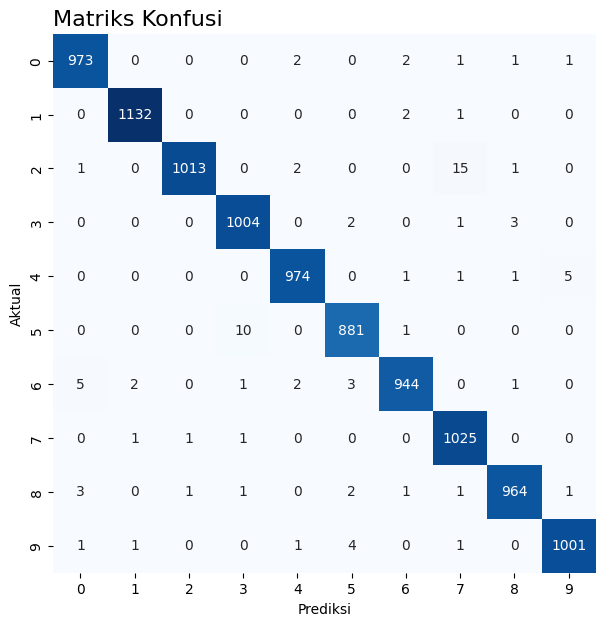

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

##### Langkah 15: Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)

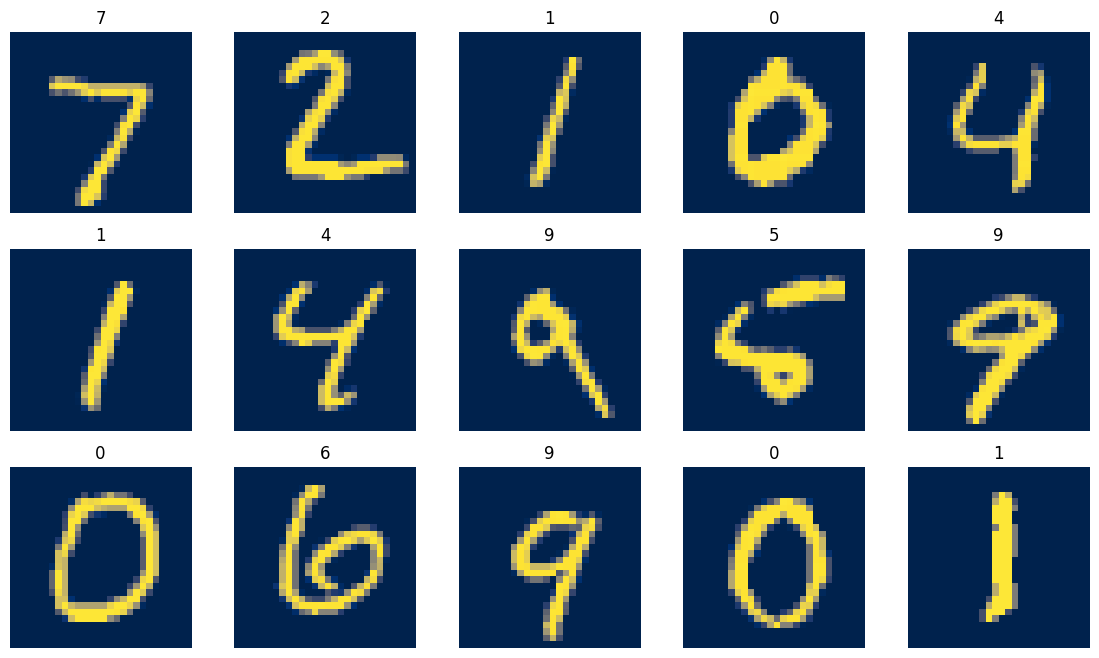

In [27]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')